In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import math

import sklearn.linear_model as slmodel
from sklearn import datasets

# Задача 2.

###  Использую $ Boston \, housing \, dataset $, имеющий размерность (506, 13), т.е. $ n =  506, k = 13, n-k = 493 $

In [67]:
x, y = datasets.load_boston(return_X_y=True)

In [68]:
model = slmodel.LinearRegression()
model.fit(x, y)
model.intercept_, model.coef_

(36.459488385089855,
 array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
        -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
         3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]))

### Выберу 1 компоненту $ x $ и посмотрю на график зависимости  $ y(x_1) $ 

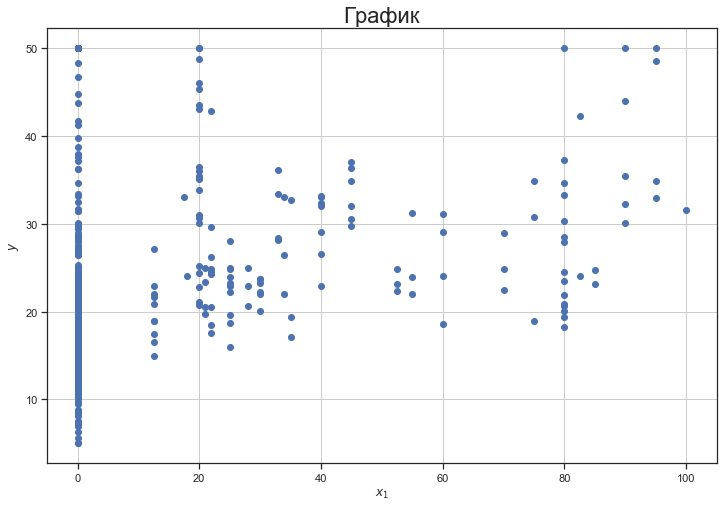

In [69]:
%matplotlib inline

plt.figure(figsize=(12, 8))
plt.scatter(x[:,1], y, label='Наши данные',  lw=1.0, color = 'b')
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.title('График', fontsize=22)
#plt.legend(loc='best', frameon=True, fontsize=18) 
plt.grid()
plt.show()

### Доверительный интервал для неё ищем по форуле: 

$$ [\hat{\beta}_{OLC,1} - t_{c}s_{\hat{\beta_1}}, \hat{\beta}_{OLC,1} + t_{c}s_{\hat{\beta_1}}]$$

In [71]:
from scipy import stats

  
t_c = stats.t.ppf(1-0.05/2, 493)
    
#model = slmodel.LinearRegression()
#model.fit(x, y)
    
e = y - model.predict(x)
s_b_1 = math.sqrt(np.transpose(e).dot(e)*(np.linalg.inv((np.transpose(x).dot(x)))[1,1])/493)
    
t_1 = model.coef_[1] - t_c*s_b_1
t_2 = model.coef_[1] + t_c*s_b_1

print('Доверительный интервал: [{}, {}]'.format(t_1, t_2))

Доверительный интервал: [0.019483657123021456, 0.07335725961073761]


### Проверим гипотезу, что $\beta_1 = 0$:   Сравним $ |t| = \frac{\hat{\beta}_{OLC,1}}{s_{\hat{\beta_1}}}$ и $ t_c $ 

In [72]:
print(model.coef_[1]/s_b_1 - t_c)

1.421150424206148


Видим, что гипотеза отвергается. На уровне значимости $ 𝛼=0.05 $

### Построим доверительный интервал для $ \sigma^2 $, учитывая, что $(n-k)\frac{s^2}{\sigma^2}$ распределено как $\chi^2(n-k)$

In [101]:
s2 = np.transpose(e).dot(e)/493
t_1 = 493*s2/stats.chi2.ppf(1-0.95/2, 493)
t_2 = 493*s2/stats.chi2.ppf(0.05/2, 493)

print(t_1, t_2)

0.0005687245369110267 0.0006486872543093234


# Задача 1.

### *первую часть задачи отправлял еще с прошлым дз, поэтому здесь будет только вторая

In [84]:
y = np.array([3, 6, 5, 3.5, 1.5])
x = np.array([[40, 60], [55, 36], [45, 36], [30, 15], [30, 90]])

model_2 = slmodel.LinearRegression()
model_2.fit(x, y)
model_2.intercept_, model_2.coef_

(0.27873865579376567, array([ 0.12287913, -0.02940725]))

## а)

### 1)$\beta_2, \beta_3, q=2$

### Линейное ограничение общего вида: $H\beta = r$

In [154]:
### Функция линейного ограничения (доверительного интервала):

def lr(H, x, beta): 
    A = H.T@np.linalg.inv((H@np.linalg.inv((x.T@x))@H.T))@H
    return A

In [93]:
H = np.array([[1, 0], [0, 1]])
A = lr(H, x, model_2.coef_)
e = y - model_2.predict(x)
c = (e.T@e)*2/3

print(c)
print(A)

0.1874150554605635
[[ 8450.  9150.]
 [ 9150. 14517.]]


Условие доверительного интервала: 
$$ (\hat{\beta} - \beta)'A (\hat{\beta} - \beta) \in [0; 19.16\cdot c] $$ 

где $19.16$ - квантиль уровня $0.05$ у $F_{2,3}$.

### 2)$\beta_2,  q=1$, $216$ (квантиль уровня $0.05$ у $F_{1,3}$)

In [97]:
H = np.array([[ 1, 0]])

A = lr(H, x, model_2.coef_)
e = y - model_2.predict(x)
c = (e.T@e)*1/3
print(c)
print(A)

0.09370752773028175
[[2682.79603224    0.        ]
 [   0.            0.        ]]


In [100]:
t_1 = model_2.coef_[1] - math.sqrt(216)*c/A[0,0]
t_2 = model_2.coef_[1] + math.sqrt(216)*c/A[0,0]

print('Искомый доверительный интервал: [{}, {}]'.format(t_1, t_2))

Искомый доверительный интервал: [-0.0299206016818756, -0.02889390136516724]


### 3) $\beta_3,  q=1$, $216$ (квантиль уровня $0.05$ у $F_{1,3}$)

In [102]:
H = np.array([[0, 1]])

A = lr(H, x, model_2.coef_)
e = y - model_2.predict(x)
c = (e.T@e)*1/3
print(c)
print(A)

0.09370752773028175
[[   0.            0.        ]
 [   0.         4609.01183432]]


In [103]:
t_1 = model_2.coef_[1] - math.sqrt(216)*c/A[1,1]
t_2 = model_2.coef_[1] + math.sqrt(216)*c/A[1,1]

print('Искомый доверительный интервал: [{}, {}]'.format(t_1, t_2))

Искомый доверительный интервал: [-0.029706060426055884, -0.029108442620986955]


### 4) $\beta_1, \beta_2, q=2$

In [111]:
H = np.array([[1, 0, 0], [0, 1, 0]])
a = np.array([[1], [1], [1], [1], [1]])

#x = np.array([[40, 60], [55, 36], [45, 36], [30, 15], [30, 90]])
x = np.hstack((a, x))

model_2.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
A = lr(H, x, model_2.coef_)
e = y - model_2.predict(x)
c = (e.T@e)*2/3
print(c)
print(A)

0.18741505546056367
[[1.13081215e+00 5.06199628e+01 0.00000000e+00]
 [5.06199628e+01 2.68279603e+03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


Условие доверительного интервала: 
$$ (\hat{\beta} - \beta)'A (\hat{\beta} - \beta) \in [0; 19.16\cdot c] $$ 

где $19.16$ - квантиль уровня $0.05$ у $F_{2,3}$.

## б)

### 1) $\beta_2 = 0, \beta_3 = 0.$

In [115]:
H = np.array([[ 1, 0], [ 0, 1]])
x = np.array([[40, 60], [55, 36], [45, 36], [30, 15], [30, 90]])
model_2.fit(x, y)
A = lr(H, x, model_2.coef_)
e = y - model_2.predict(x)
c = (e.T@e)*2/3
print(c)
print(A)

0.1874150554605635
[[ 8450.  9150.]
 [ 9150. 14517.]]


In [126]:
print(model_2.coef_.T@A@model_2.coef_ < 19.16*c)

False


Условие не выполняется $ \Rightarrow $ отвергаем гипотезу

### 2) $ \beta_3 = 0.$

In [122]:
H = np.array([[0, 1]])
x = np.array([[40, 60], [55, 36], [45, 36], [30, 15], [30, 90]])

model_2.fit(x, y)
A = lr(H, x, model_2.coef_)
e = y - model_2.predict(x)
c = (e.T@e)*1/3
print(c)
print(A)

0.09370752773028175
[[   0.            0.        ]
 [   0.         4609.01183432]]


In [128]:
print(model_2.coef_.T@A@model_2.coef_ < 216*c)

True


$ \Rightarrow $ не отвергаем гипотезу

### 3) $ \beta_2 = 0.$

In [129]:
H = np.array([[1, 0]])

A = lr(H, x, model_2.coef_)
e = y - model_2.predict(x)
c = (e.T@e)*1/3
print(c)
print(A)

0.09370752773028175
[[2682.79603224    0.        ]
 [   0.            0.        ]]


In [130]:
print(model_2.coef_.T@A@model_2.coef_ < 216*c)

False


Условие не выполняется $ \Rightarrow $ отвергаем гипотезу

### 4) $ \beta_2 = 1.$

In [131]:
H = np.array([[ 1, 0]])

A = lr(H, x, model_2.coef_)
e = y - model_2.predict(x)
c = (e.T@e)*1/3
print(c)
print(A)

coef = model_2.coef_ - [1, 0]

0.09370752773028175
[[2682.79603224    0.        ]
 [   0.            0.        ]]


In [133]:
print(coef.T@A@coef < 216*c)

False


Условие не выполняется $ \Rightarrow $ отвергаем гипотезу

### 5) $ \beta_2 = 1.57$

In [137]:
H = np.array([[1, 0]])

A = lr(H, x, model_2.coef_)
e = y - model_2.predict(x)
c = (e.T@e)*1/3
print(c)
print(A)

coef = model_2.coef_ - [1.57, 0]

0.09370752773028175
[[2682.79603224    0.        ]
 [   0.            0.        ]]


In [138]:
print(coef.T@A@coef < 216*c)

False


Условие не выполняется $ \Rightarrow $ отвергаем гипотезу

### 6) $\beta_2 = -5\beta_3$

In [141]:
H = np.array([[ 1, -5]])

A = lr(H, x, model_2.coef_)
e = y - model_2.predict(x)
c = (e.T@e)*1/3
print(c)
print(A)

0.09370752773028175
[[ 122.75512423 -613.77562116]
 [-613.77562116 3068.87810582]]


Найдем значения $\beta_2, \beta_3 $: $\beta_2 = -5\beta_3$, которые минимизируют функцию $(\hat{\beta} - \beta)'A (\hat{\beta} - \beta)$

In [143]:
give_minimum = (-model_2.coef_[0]*(A[0,0]+A[1,0]) - model_2.coef_[1]*(A[0,1]+A[1,1]))/((A[0,0]+A[1,0]) -5*(A[0,1]+A[1,1]))

coef = model_2.coef_ - [ give_minimum, -5*give_minimum]

In [144]:
print(coef.T@A@coef < 216*c)

False


Т.к. даже при минимальном значении фунцкции $(\hat{\beta} - \beta)'A (\hat{\beta} - \beta)$ при условии $\beta_2 = -5\beta_3$ гипотеза отвергается, то она отвергается всегда на уровне значимости $ \alpha = 0.05 $

## в)

### 1)

In [147]:
#снова обучаем модель
y = np.array([3, 6, 5, 3.5, 1.5])
x = np.array([[40, 60], [55, 36], [45, 36], [30, 15], [30, 90]])
model_2.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
print('Проноз: {}'.format(model_2.intercept_ + model_2.coef_[0]*30 + model_2.coef_[1]*52.5))

Проноз: 2.4212317506247536


### 2)

Ответ не является средним значением между накоплением семей 4 и 5, т.к. модель строилась не только по этим двум семьям, а так же и по другим трем, которые вносят в эту модель свои коррективы

### 3) Доверительный интервал:

In [153]:
t_1 = model_2.intercept_ + model_2.coef_[0]*30 + model_2.coef_[1]*52.5 - 1.95
t_2 = model_2.intercept_ + model_2.coef_[0]*30 + model_2.coef_[1]*52.5 + 1.95
print('Доверительный интервал: [{}, {}]'.format(t_1, t_2))

Доверительный интервал: [0.47123175062475364, 4.371231750624753]
